#  Regresión con Soporte Vectorial

**Contexto**  
Este conjunto de datos consiste en una lista de puestos en una empresa junto con los niveles y su salario asociado.

**Contenido**  
El conjunto de datos incluye columnas para el Puesto con valores que van desde Analista de negocios, Consultor junior hasta CEO, Nivel que varía de 1 a 10 y, finalmente, el Salario asociado con cada puesto que varía de **45,000 a 1,000,000**.

**Planteamiento del problema**  
El enunciado del problema es que el candidato con nivel 6.5 tenía un salario anterior de 160000. Para contratar al candidato para un nuevo puesto, a la compañía le gustaría confirmar si está siendo honesto acerca de su último salario para que pueda tomar una decisión de contratación . Para hacer esto, haremos uso del método Soporte vectorial para predecir el salario exacto del empleado.

## Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## Importar el archivo Position_Salaries.csv

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
#Revisemos los datos
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Crear las variables X (todas las filas, columna [1:2]) & y (todas las filas, columna 2)

In [5]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Realiza el escalado de variables

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
y = y.ravel()

## Divide el conjunto de datos en conjunto de entrenamiento y conjunto de prueba

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Genera el modelo de SVR con diferentes kernels ("linear", ,"rbf",["poly",degree = 3])

#### Genera el modelo "Lineal"

In [33]:
## Escribe tu código aqui
X_test

array([[1.5666989 ],
       [0.17407766]])

In [22]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

La predicción es: [ 0.36511906 -0.20949889]


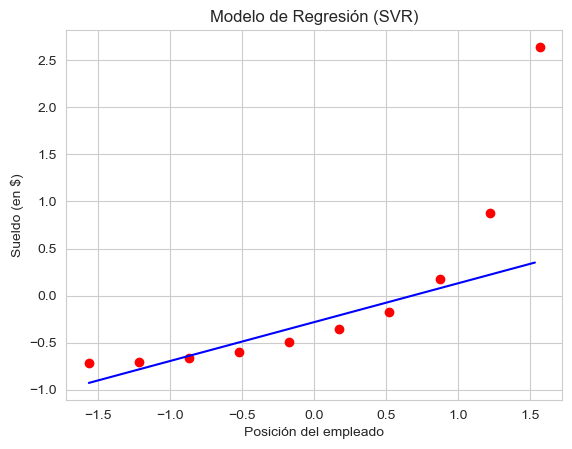

In [24]:
# Predicción de nuestros modelos con SVR
y_pred = model.predict(X_test)
print("La predicción es:", y_pred)
# Visualización de los resultados del SVR
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

#### Genera el modelo "rbf"

In [ ]:
## Escribe tu código aqui


In [27]:
model = SVR(kernel = "rbf")
model.fit(X_train, y_train)

SVR()

La predicción es: [ 0.55177692 -0.32526811]


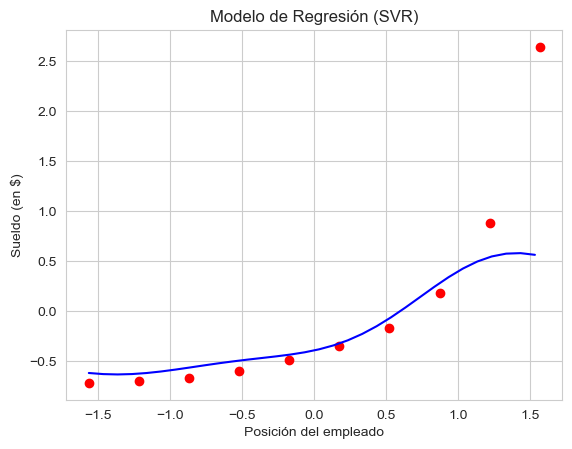

In [29]:
# Predicción de nuestros modelos con SVR
y_pred = model.predict(X_test)
print("La predicción es:", y_pred)
# Visualización de los resultados del SVR
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

#### Genera el modelo "poly"

In [ ]:
## Escribe tu código aqui


In [30]:
model = SVR(kernel='poly', degree=3, gamma='auto')
model.fit(X_train, y_train)

SVR(gamma='auto', kernel='poly')

La predicción es: [ 0.34830661 -0.29734811]


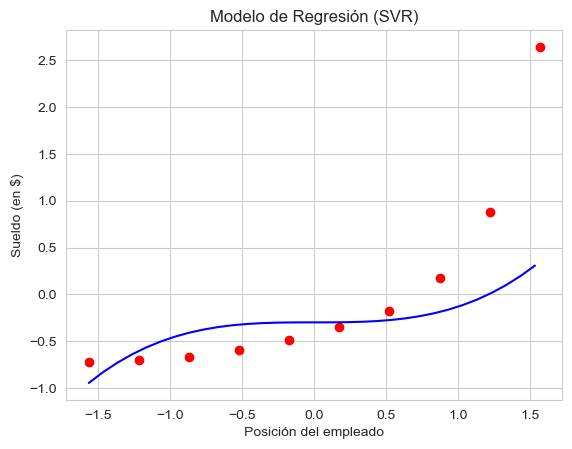

In [32]:
# Predicción de nuestros modelos con SVR
y_pred = model.predict(X_test)
print("La predicción es:", y_pred)
# Visualización de los resultados del SVR
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()